## Support Vector Machine Classification For Heart Diseases DataSet

## Importing the Libraries

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

## Importing the dataset

In [11]:
dataset = pd.read_csv('D:/archive1/heart_Disease.csv')
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Dataset Description

In [12]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


##  Plotting Correlation between Features

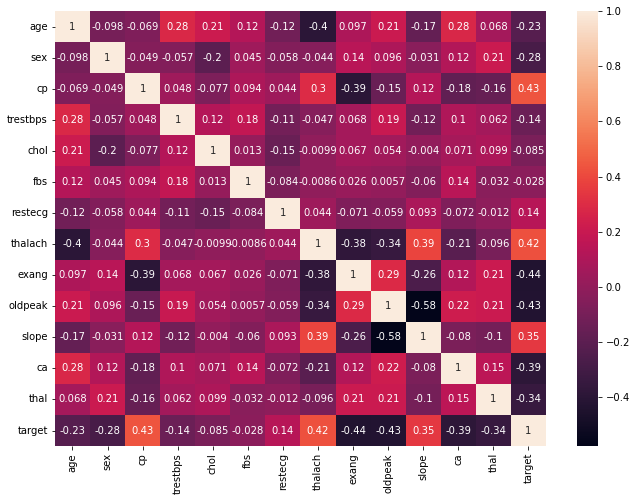

In [14]:
corrMatrix = dataset.corr()
plt.figure(figsize=(11,8))
sn.heatmap ( corrMatrix , annot = True )
plt.show ( )

## Input and Output feature selection

In [16]:
X=dataset.iloc[:, 0:13].values
y=dataset.iloc[:, 13].values

## Splitting the dataset into the Training set and Test set

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 109)

## Feature Scaling

In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## Fitting SVM to the Training set

In [31]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 109)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=109)

## Predicting the Test set results

In [32]:
y_pred = classifier.predict(X_test)

## Plotting Confusion Matrix

<AxesSubplot:>

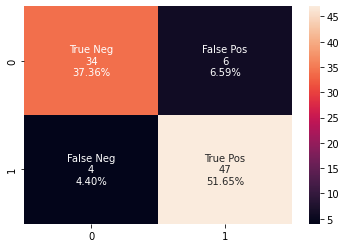

In [37]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='')

## Model Accuracy and Scores

In [45]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print ('Classifier',classifier.score(X_test, y_test))
print('roc_auc: ', roc_auc_score(y_test, y_pred))
print('precision: ', precision_score(y_test, y_pred))
print('recall: ', recall_score(y_test, y_pred))
print('f1: ', f1_score(y_test, y_pred))

Classifier 0.8901098901098901
roc_auc:  0.88578431372549
precision:  0.8867924528301887
recall:  0.9215686274509803
f1:  0.9038461538461539


## Plotting Model Classification Report

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87        40
           1       0.89      0.92      0.90        51

    accuracy                           0.89        91
   macro avg       0.89      0.89      0.89        91
weighted avg       0.89      0.89      0.89        91

